In [1]:
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd

# Data Preparation

### Data Exploration

could this photo be from a zoo
yes


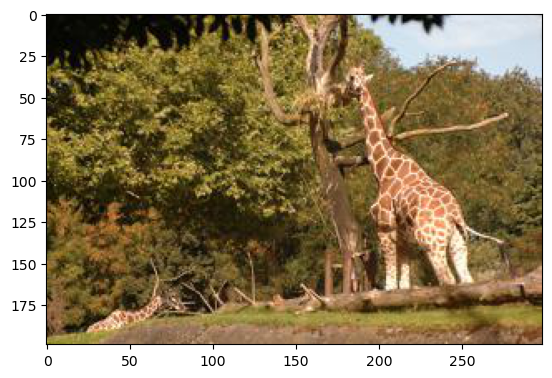

are there flowers in the vase
yes


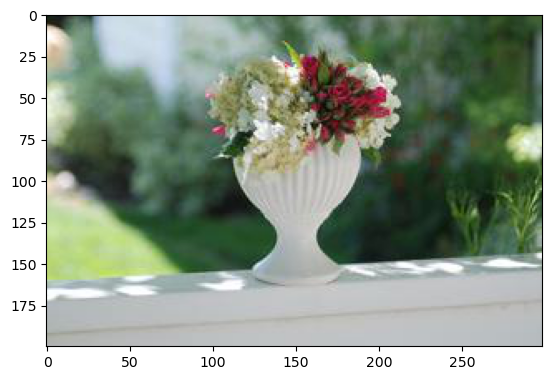

is this a horse
no


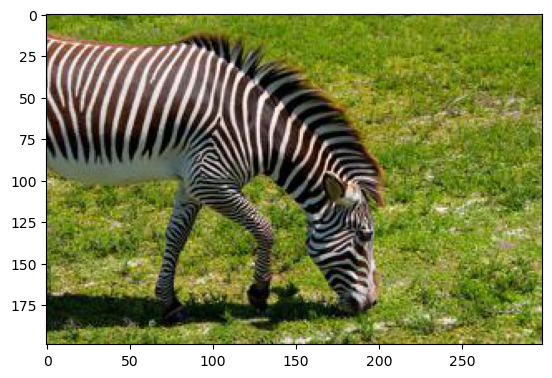

In [2]:
image_samples = os.listdir('./thumbnails/')[:5]
df = pd.read_csv("./starter2.csv", names=['question', 'answer', 'image'])
for image in image_samples:
    for r in df.iterrows():
        if image in r[1][2]:
            print(r[1][0])
            print(r[1][1])
            img = mpimg.imread('./thumbnails/' + image)
            imgplot = plt.imshow(img)
            plt.show()
    

In [3]:
import csv 
with open('starter2.csv') as myfile:
   reader = csv.reader(myfile, delimiter=',')
   for row in reader:
      question, answer, image = row
      image = image.strip()
      assert os.path.exists(os.path.join('./thumbnails', image))

### Convert answers to numeric format

In [4]:
for row in df.iterrows():
    row[1]['answer'] = 1.0 if row[1]['answer'] == 'yes' else 0.0

In [5]:
df

,question,answer,image
0,is this man a professional baseball player,1.0,COCO_train2014_000000458752.jpg
1,is the dog waiting,1.0,COCO_train2014_000000524291.jpg
2,is the sky blue,1.0,COCO_train2014_000000393221.jpg
3,is the window open,1.0,COCO_train2014_000000393223.jpg
4,is the man smiling,0.0,COCO_train2014_000000393224.jpg
...,...,...,...
19995,could a person lift the object in the image,0.0,COCO_train2014_000000051717.jpg
19996,are all of the computers the same,0.0,COCO_train2014_000000444941.jpg
19997,is she taking a selfie,0.0,COCO_train2014_000000182799.jpg
19998,is the person climbing a mountain,0.0,COCO_train2014_000000238245.jpg


### Convert image names to absolute paths

In [6]:
for row in df.iterrows():
    row[1]['image'] = './thumbnails/' + row[1]['image']  
df

,question,answer,image
0,is this man a professional baseball player,1.0,./thumbnails/COCO_train2014_000000458752.jpg
1,is the dog waiting,1.0,./thumbnails/COCO_train2014_000000524291.jpg
2,is the sky blue,1.0,./thumbnails/COCO_train2014_000000393221.jpg
3,is the window open,1.0,./thumbnails/COCO_train2014_000000393223.jpg
4,is the man smiling,0.0,./thumbnails/COCO_train2014_000000393224.jpg
...,...,...,...
19995,could a person lift the object in the image,0.0,./thumbnails/COCO_train2014_000000051717.jpg
19996,are all of the computers the same,0.0,./thumbnails/COCO_train2014_000000444941.jpg
19997,is she taking a selfie,0.0,./thumbnails/COCO_train2014_000000182799.jpg
19998,is the person climbing a mountain,0.0,./thumbnails/COCO_train2014_000000238245.jpg


### Shuffle and create a test set

In [7]:
TEST_SIZE = 4000
df_shuffled = df.sample(frac=1).reset_index(drop=True)
test_data = df_shuffled.loc[:TEST_SIZE - 1]
df_shuffled = df_shuffled.loc[TEST_SIZE:]

X_test, y_test = test_data[['question', 'image']], test_data['answer']

In [8]:
X_test.shape, y_test.shape

((4000, 2), (4000,))

### Limit the size of the dataset, and balance

In [9]:
df_yes = df_shuffled[df_shuffled["answer"] == 1.0]
df_no = df_shuffled[df_shuffled["answer"] == 0.0]
df_yes.shape, df_no.shape


((8051, 3), (7949, 3))

In [10]:
dev_df =  pd.concat([df_yes, df_no])
dev_df = dev_df.sample(frac=1).reset_index(drop=True)

In [11]:
dev_df

,question,answer,image
0,is this suit for a professional,1.0,./thumbnails/COCO_train2014_000000305208.jpg
1,are there a lot of cars on the street,1.0,./thumbnails/COCO_train2014_000000016616.jpg
2,is this persons shirt one solid color,0.0,./thumbnails/COCO_train2014_000000031157.jpg
3,is there a reflection on the refrigerator,1.0,./thumbnails/COCO_train2014_000000560311.jpg
4,are these buffalos,0.0,./thumbnails/COCO_train2014_000000568087.jpg
...,...,...,...
15995,is the man cleanshaven,0.0,./thumbnails/COCO_train2014_000000556954.jpg
15996,is the clock made of an unusual material,0.0,./thumbnails/COCO_train2014_000000429305.jpg
15997,are these fragile objects,1.0,./thumbnails/COCO_train2014_000000023108.jpg
15998,is the person wearing boots,1.0,./thumbnails/COCO_train2014_000000287474.jpg


### Create training and validation sets

In [12]:
X = dev_df[['question','image']]
y = dev_df['answer']

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

,question,image
676,can you see inside the shower,./thumbnails/COCO_train2014_000000306031.jpg
12113,is the front fender of the motorcycle white,./thumbnails/COCO_train2014_000000282208.jpg
7077,are these people businessmen,./thumbnails/COCO_train2014_000000436649.jpg
13005,is the woman hot,./thumbnails/COCO_train2014_000000159856.jpg
12123,is the woman in a shopping mall,./thumbnails/COCO_train2014_000000543716.jpg
...,...,...
13418,is this an adult elephant,./thumbnails/COCO_train2014_000000028097.jpg
5390,are the having broccoli,./thumbnails/COCO_train2014_000000284290.jpg
860,is the player sponsored by nike,./thumbnails/COCO_train2014_000000542090.jpg
15795,does this look like a real living area,./thumbnails/COCO_train2014_000000147290.jpg


In [15]:
y_train

676      0.0
12113    1.0
7077     0.0
13005    0.0
12123    0.0
        ... 
13418    1.0
5390     0.0
860      1.0
15795    1.0
7270     0.0
Name: answer, Length: 12800, dtype: object

In [16]:
X_val

,question,image
8756,doesnt that dog look happy,./thumbnails/COCO_train2014_000000179331.jpg
4660,is the board customized,./thumbnails/COCO_train2014_000000533342.jpg
6095,are these sheep contained,./thumbnails/COCO_train2014_000000266207.jpg
304,is this an italian meal,./thumbnails/COCO_train2014_000000268072.jpg
8241,is this an ocean area,./thumbnails/COCO_train2014_000000000109.jpg
...,...,...
15578,is there a avocado in the bowl,./thumbnails/COCO_train2014_000000006809.jpg
5746,is the childs hands messy,./thumbnails/COCO_train2014_000000218941.jpg
6395,is the girl also playing frisbee,./thumbnails/COCO_train2014_000000053170.jpg
7624,is this normally found in the bathroom,./thumbnails/COCO_train2014_000000463616.jpg


In [17]:
y_val

8756     1.0
4660     1.0
6095     0.0
304      0.0
8241     1.0
        ... 
15578    1.0
5746     1.0
6395     1.0
7624     1.0
15245    0.0
Name: answer, Length: 3200, dtype: object

In [18]:
X_test

,question,image
0,is the bus making a uturn,./thumbnails/COCO_train2014_000000290849.jpg
1,could this be an appraisal,./thumbnails/COCO_train2014_000000165607.jpg
2,is the cat sitting on a purse,./thumbnails/COCO_train2014_000000005142.jpg
3,do they like striped shirts,./thumbnails/COCO_train2014_000000395445.jpg
4,is this man in danger of ripping the net,./thumbnails/COCO_train2014_000000176295.jpg
...,...,...
3995,will he hit a home run,./thumbnails/COCO_train2014_000000024571.jpg
3996,is this bed arranged,./thumbnails/COCO_train2014_000000553192.jpg
3997,is this a store,./thumbnails/COCO_train2014_000000400603.jpg
3998,do they kiss,./thumbnails/COCO_train2014_000000009851.jpg


In [19]:
y_test

0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
3995    0.0
3996    1.0
3997    1.0
3998    0.0
3999    1.0
Name: answer, Length: 4000, dtype: object

### Forward images through InceptionV3, and cache activations to disk

In [20]:
# Create a feature extraction model.
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
activations_model = tf.keras.Model(new_input, hidden_layer)

In [21]:
# load an image off disk and preprocess it appropriately for the model above.
def preprocess_img(image_path):
  img = tf.io.read_file(image_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (299, 299))
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path

In [22]:
# create a set of the absolute paths to all of these images
image_path_set = set(list(X_train['image']) + list(X_val['image']) + list(X_test['image']))

print("Images to preprocess", len(image_path_set))
print("This make take a few minutes")

Images to preprocess 20000
This make take a few minutes


In [23]:
# Extract activations for each image and save them to disk 
# in NumPy format. 

# Create a dataset to load each image off disk, and extract activations
image_dataset = tf.data.Dataset.from_tensor_slices(list(image_path_set))
image_dataset = image_dataset.map(
  preprocess_img, 
  num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)

# Loop over the datset, and save all activations to disk in NumPy format
for img_batch, path_batch in image_dataset:
  batch_features = activations_model(img_batch)
  for bf, p in zip(batch_features, path_batch):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())  

### Create lists of questions, answers, and images for your train, validation, and test set

In [24]:
questions_train = list(X_train['question'])
answers_train = list(y_train)
images_train = list(X_train['image'])

In [25]:
questions_val = list(X_val['question'])
answers_val = list(y_val)
images_val = list(X_val['image'])

In [26]:
questions_test = list(X_test['question'])
answers_test = list(y_test)
images_test = list(X_test['image'])

### Create and adapt a TextVectorization layer

In [27]:
VOCAB_SIZE = 3000 
MAX_SEQ_LEN = 20

In [28]:
from tensorflow.keras.layers import TextVectorization

int_vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQ_LEN)

# Set up the layer by creating dataset containing only the training questions
train_qs_ds = tf.data.Dataset.from_tensor_slices(questions_train)
int_vectorize_layer.adapt(train_qs_ds)

In [29]:
question_train_vec = int_vectorize_layer(questions_train).numpy()
question_val_vec = int_vectorize_layer(questions_val).numpy()
question_test_vec = int_vectorize_layer(questions_test).numpy()

In [30]:
question_train_vec[0], questions_train[0]

(array([ 29,  20,  37, 208,   2, 290,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0], dtype=int64),
 'can you see inside the shower')

In [31]:
question_val_vec[0], questions_val[0]

(array([  1,  28,  35,  31, 133,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0], dtype=int64),
 'doesnt that dog look happy')

In [32]:
question_test_vec[0], questions_test[0]

(array([  3,   2,  57, 521,   4,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0], dtype=int64),
 'is the bus making a uturn')

### Create a tf.dataset for training, validation, and testing

In [33]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000

In [34]:
# Load cached activations off disk.
def load_np(img_path, question, answer):
  activations = np.load(img_path.decode('utf-8')+'.npy')
  return activations, question, answer, img_path

In [35]:
# This method will create a dataset that returns four elements.
# - a batch of activations (loaded from disk)
# - a batch of padded questions
# - a batch of numeric answers
# - a batch of absolute paths to the corresponding images
def create_dataset(images, sequences, answers):
  dataset = tf.data.Dataset.from_tensor_slices((images, 
                                                sequences, 
                                                answers))
  # Load the cached activations off disk
  dataset = dataset.map(lambda x, y, z: tf.numpy_function(
      load_np, [x, y, z], [tf.float32, tf.int64, tf.float32, tf.string]),
      num_parallel_calls=tf.data.experimental.AUTOTUNE)
  
  # Shuffle and batch
  dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
  dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  return dataset

In [36]:
train_ds = create_dataset(images_train, question_train_vec, answers_train)
val_ds = create_dataset(images_val, question_val_vec, answers_val)
test_ds = create_dataset(images_test, question_test_vec, answers_test)

In [37]:
my_iterator = iter(train_ds)
activations_batch, questions_batch, answers_batch, paths_batch = next(my_iterator)

print(activations_batch.shape, 
      questions_batch.shape, 
      answers_batch.shape, 
      paths_batch.shape)
      
print(activations_batch[0], 
      questions_batch[0], 
      answers_batch[0], 
      paths_batch[0])

(32, 8, 8, 2048) (32, 20) (32,) (32,)
tf.Tensor(
[[[0.6508643  0.         1.2660697  ... 1.990705   0.01996762 0.        ]
  [2.0511355  0.         1.6807139  ... 1.8171034  0.19057359 0.        ]
  [2.7297862  0.         0.41487762 ... 1.6673356  0.2085187  0.        ]
  ...
  [1.7068009  1.0406994  0.         ... 1.2054579  0.         0.        ]
  [2.9898462  0.46706796 0.85232854 ... 1.1562501  0.         0.        ]
  [1.7831866  0.71553457 0.         ... 0.81453013 0.         0.        ]]

 [[0.         0.         0.55068934 ... 1.6738564  0.12010217 0.        ]
  [0.         0.         0.41682744 ... 1.4285723  0.22297621 0.        ]
  [0.74572194 0.         0.         ... 1.1168917  0.         0.        ]
  ...
  [0.         0.8835839  0.         ... 0.72031766 0.         0.        ]
  [0.1673525  0.1355396  0.         ... 0.69129133 0.         0.        ]
  [0.65188146 0.03956436 0.         ... 0.4516455  0.         0.        ]]

 [[0.9733032  0.         0.9477589  ... 0.88292

# Define VQA Model

In [38]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, LSTM
from tensorflow.keras.models import Model, Sequential

In [39]:
# Input to your vision model (activations from Inception-V3,
# loaded off disk disk by the dataset above).
image_input = Input(shape=(8, 8, 2048)) 
vision_model = Sequential()
# Used to reduce the number of parameters (rather using a dense layer here).
vision_model.add(tf.keras.layers.GlobalAveragePooling2D())
# Output of vision model
encoded_image = vision_model(image_input) 

# text processing 
question_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32') 
embedded_question = Embedding(input_dim=10000, output_dim=128, input_length=MAX_SEQ_LEN)(question_input) 
encoded_question = LSTM(128)(embedded_question) 

merged = tf.keras.layers.concatenate([encoded_image, encoded_question])
dense = Dense(128, activation='relu')(merged)
output = Dense(1, activation='sigmoid')(dense)

model = Model(inputs=[image_input, question_input], outputs=output)

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 8, 2048)  0           []                               
                                ]                                                                 
                                                                                                  
 embedding (Embedding)          (None, 20, 128)      1280000     ['input_3[0][0]']                
                                                                                                  
 sequential (Sequential)        (None, 2048)         0           ['input_2[0][0]']          

In [41]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Plot model

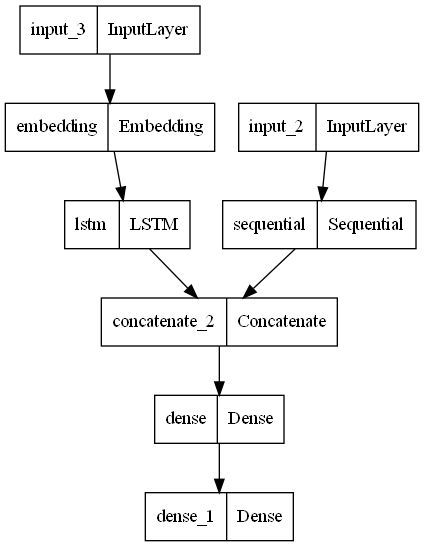

In [42]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')

### Fit model on a single batch

In [43]:
activations_batch, questions_batch, answers_batch, paths_batch = next(iter(train_ds))

In [44]:
for i in range(300):
    metrics = model.train_on_batch([activations_batch, questions_batch], answers_batch)
    print(i, "loss: %f" % metrics[0])

0 loss: 0.854002
1 loss: 1.049843
2 loss: 0.834927
3 loss: 0.543839
4 loss: 0.425391
5 loss: 0.464698
6 loss: 0.461950
7 loss: 0.379172
8 loss: 0.300261
9 loss: 0.260722
10 loss: 0.243746
11 loss: 0.227707
12 loss: 0.201280
13 loss: 0.168699
14 loss: 0.139857
15 loss: 0.122070
16 loss: 0.112405
17 loss: 0.102650
18 loss: 0.088987
19 loss: 0.074141
20 loss: 0.062145
21 loss: 0.054098
22 loss: 0.048895
23 loss: 0.044725
24 loss: 0.040177
25 loss: 0.035109
26 loss: 0.030126
27 loss: 0.025999
28 loss: 0.022963
29 loss: 0.020888
30 loss: 0.019382
31 loss: 0.018084
32 loss: 0.016661
33 loss: 0.015087
34 loss: 0.013502
35 loss: 0.012073
36 loss: 0.010884
37 loss: 0.009940
38 loss: 0.009221
39 loss: 0.008664
40 loss: 0.008197
41 loss: 0.007753
42 loss: 0.007317
43 loss: 0.006880
44 loss: 0.006455
45 loss: 0.006053
46 loss: 0.005684
47 loss: 0.005355
48 loss: 0.005067
49 loss: 0.004828
50 loss: 0.004624
51 loss: 0.004444
52 loss: 0.004279
53 loss: 0.004122
54 loss: 0.003971
55 loss: 0.003823
56

### Make predictions on the same batch above

In [45]:
for prediction, answer in zip(model.predict(x=[activations_batch, questions_batch]), answers_batch):
  print(prediction, answer.numpy())

1/1 [==============================] - 0s 369ms/step
[1.2166205e-06] 0.0
[0.9999988] 1.0
[0.999998] 1.0
[1.2906326e-05] 0.0
[1.5352789e-05] 0.0
[2.9041641e-06] 0.0
[2.5149952e-06] 0.0
[0.9999975] 1.0
[0.99999785] 1.0
[3.8764225e-07] 0.0
[1.7549355e-05] 0.0
[1.2823225e-06] 0.0
[1.0206171e-06] 0.0
[3.7721356e-06] 0.0
[4.580607e-06] 0.0
[3.064404e-05] 0.0
[0.99999905] 1.0
[0.999998] 1.0
[0.99999857] 1.0
[1.2264209e-06] 0.0
[2.0098178e-05] 0.0
[0.9999987] 1.0
[0.9999989] 1.0
[0.99999607] 1.0
[8.7203324e-07] 0.0
[4.4599602e-07] 0.0
[3.1696532e-06] 0.0
[0.99999976] 1.0
[0.9999962] 1.0
[3.350978e-07] 0.0
[1.4025934e-06] 0.0
[0.9999938] 1.0


### Metrics

In [46]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

val_loss = tf.keras.metrics.BinaryCrossentropy(name='val_loss')
val_accuracy = tf.keras.metrics.BinaryAccuracy(name='val_accuracy')

### Validation dataset evaluation
Evaluate for a fixed number of steps

In [47]:
def evaluate(max_steps=None):
  steps = 0
  for activation_batch, question_batch, answer_batch, path_batch in val_ds:
    if max_steps != None and steps == max_steps:
      break
    predictions = model.predict(x=[activation_batch, question_batch])
    steps += 1 
    # Record metrics after each batch
    val_loss(answer_batch, predictions)
    val_accuracy(answer_batch, predictions)

# Train Model

In [48]:
import time

train_loss_history, train_acc_history = [], []
val_loss_history, val_acc_history = [], []

epochs = 5

# Training loop
for epoch in range(epochs):

  start = time.time()

  # Train for one epoch
  for activation_batch, question_batch, answer_batch, path_batch in train_ds:
    result = model.train_on_batch(x=[activation_batch, question_batch], y=answer_batch)

    # Record metrics after each batch
    train_loss(result[0])
    train_accuracy(result[1])

  # Evaluate for a few steps
  evaluate(max_steps=100)

  # Print progress
  template = 'Epoch {}, Loss: {:.2f}, Accuracy: {:.2f}, Val Loss {:.2f}, Val Accuracy {:.2f}, Time: {:.1f} secs'
  print(template.format(epoch,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        val_loss.result(),
                        val_accuracy.result() * 100,
                        time.time() - start))
  
  # Record history
  train_loss_history.append(train_loss.result())
  train_acc_history.append(train_accuracy.result() * 100)
  val_loss_history.append(val_loss.result())
  val_acc_history.append(val_accuracy.result() * 100)

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  val_loss.reset_states()
  val_accuracy.reset_states()


1/1 [==============================] - 0s 27ms/step
Epoch 0, Loss: 0.74, Accuracy: 51.75, Val Loss 0.71, Val Accuracy 50.44, Time: 29.9 secs
1/1 [==============================] - 0s 26ms/step
Epoch 1, Loss: 0.68, Accuracy: 55.59, Val Loss 0.70, Val Accuracy 52.62, Time: 26.2 secs
1/1 [==============================] - 0s 32ms/step
Epoch 2, Loss: 0.67, Accuracy: 58.58, Val Loss 0.71, Val Accuracy 53.03, Time: 25.7 secs
1/1 [==============================] - 0s 27ms/step
Epoch 3, Loss: 0.64, Accuracy: 62.81, Val Loss 0.72, Val Accuracy 54.00, Time: 25.7 secs
1/1 [==============================] - 0s 31ms/step
Epoch 4, Loss: 0.61, Accuracy: 67.27, Val Loss 0.73, Val Accuracy 54.09, Time: 26.2 secs


### Create plots of training and validation loss and accuracy

In [49]:
def plot(loss, acc, val_loss, val_acc):

  epochs = range(len(loss))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()


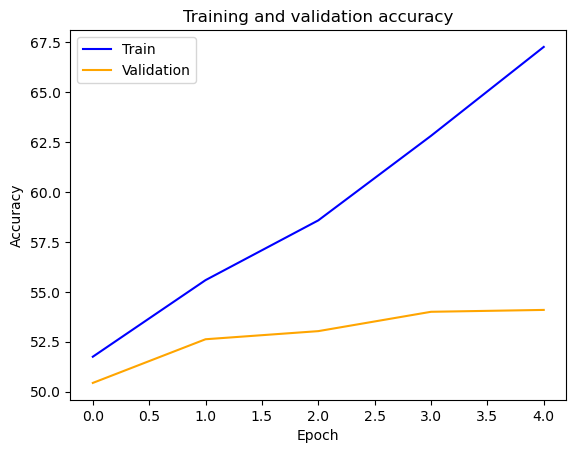

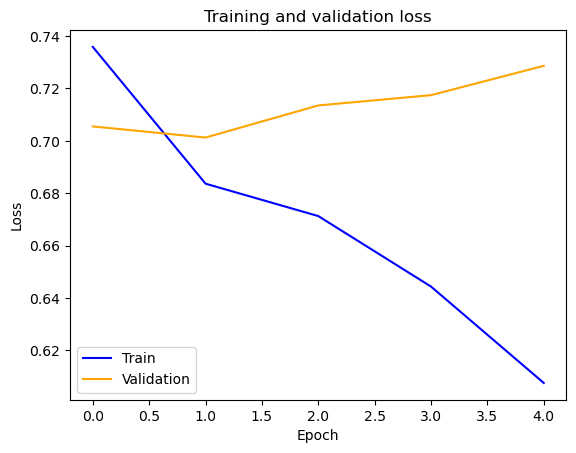

In [50]:
plot(train_loss_history, train_acc_history, val_loss_history, val_acc_history)

# Evaluate Model

In [51]:
# Calculate accuracy on the test set
test_loss = tf.keras.metrics.BinaryCrossentropy(name='test_loss')
test_accuracy = tf.keras.metrics.BinaryAccuracy(name='test_accuracy')

def test(model):
  for activation_batch, question_batch, answer_batch, path_batch in test_ds:
    predictions = model.predict(x=[activation_batch, question_batch])
    test_loss(answer_batch, predictions)
    test_accuracy(answer_batch, predictions)

test(model)
print("Test_Loss: {:.2f}, Test_Accuracy: {:.2f}".format(test_loss.result(),test_accuracy.result() * 100))

1/1 [==============================] - 0s 26ms/step
Test_Loss: 0.73, Test_Accuracy: 53.62
